In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import r2_score

Projekt ma na celu przewidzieć szanse zwycięstwa niebieskiej drużyny (blueWins)

w grze League of Legends na podstawie danych z 10 min gry

In [29]:
df = pd.read_csv('/content/high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [30]:
cols = df.columns
print(cols)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


Oddzielenie docelowej zmiennej i losowej zmienniej gamid która nie jest użyteczna

In [31]:
Nwin = df.blueWins

drop_cols = ['gameId','blueWins']
x = df.drop(drop_cols, axis=1)

x.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Dataset jest zrównoważony

Red Wins: 4949 (50.096%), Blue Wins: 4930(49.904%)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


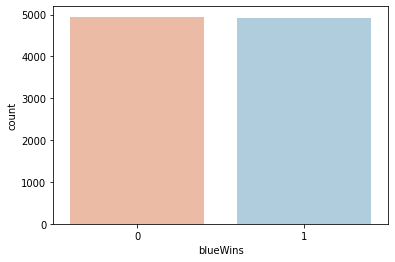

In [32]:
ax = sns.countplot(Nwin, label='Count', palette='RdBu')
W, L = Nwin.value_counts()

print('Red Wins: {} ({}%), Blue Wins: {}({}%)'.format(W,round(100*W/(W+L),3),L,round(100*L/(W+L),3)))

In [33]:
x.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [34]:
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)
x.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,15,6,8,0,0,0,0,16567,6.8,17047,197,55
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,2,2,1,1,1,17620,6.8,17438,240,52
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,15,3,14,0,0,0,0,17285,6.8,17254,203,28
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,15,2,10,0,0,0,0,16478,7.0,17961,235,47
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,17,2,7,1,1,0,0,17404,7.0,18313,225,67


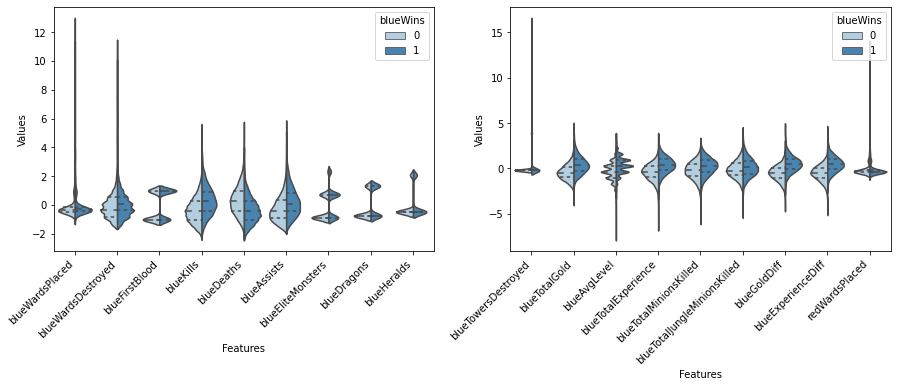

In [35]:

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([Nwin, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1,2,figsize=(15,5))


sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Reds')
fig.autofmt_xdate(rotation=45)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([Nwin, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')


sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Reds')
fig.autofmt_xdate(rotation=45)

plt.show()

Odrzucenie powtarzających się danych

Spostrzeżenia z wykresu
- blueKills ma duży wpływ na wynik 
- Podobnie blueDeaths
- FirstBlood ma pozytywny wpływ na wynik gry
- Złoto i doświadczenie ma duży wpływ na wynik
- Minions i JungleMinions ma znikomy wpływ na wynik

Poniższa analiza będzie miała na celu zamianę podziału red/blue na różnice w zmiennych 'diff' oraz odrzucenie niepowiązanych zmiennych

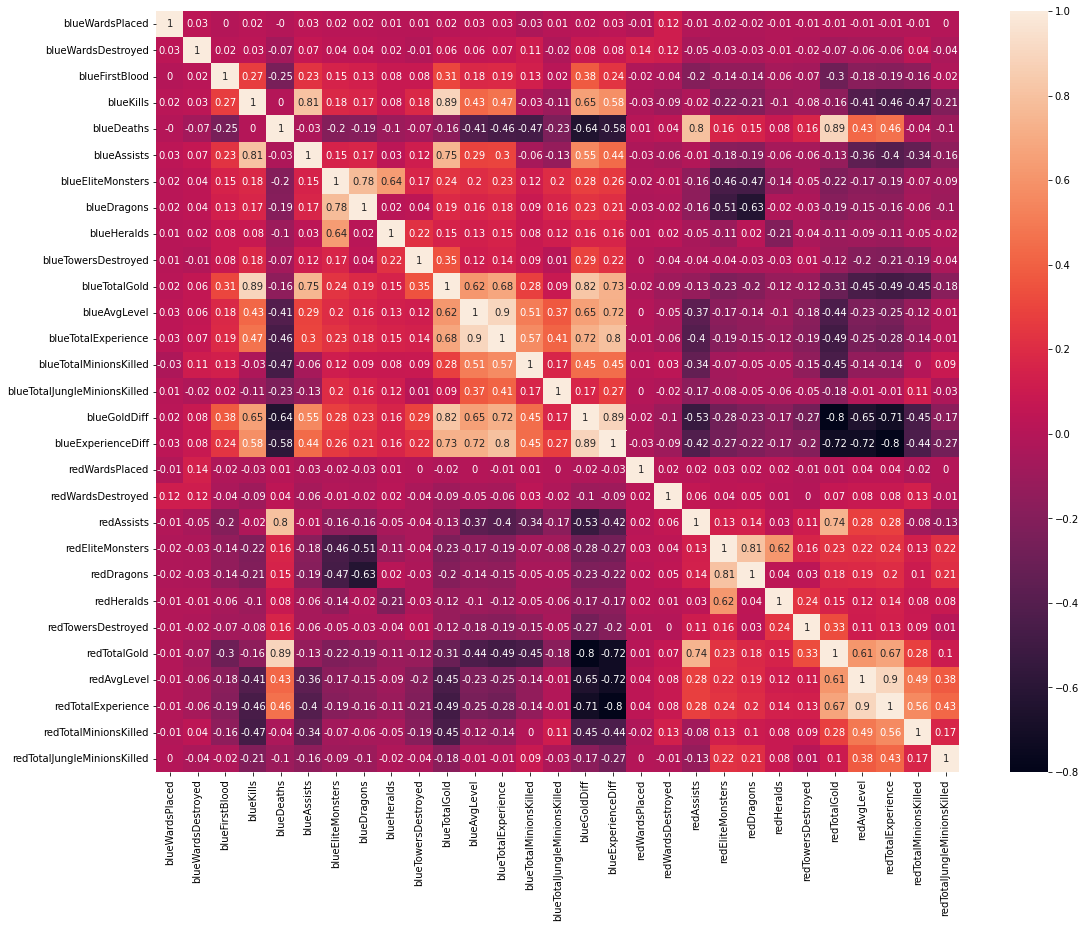

In [36]:
plt.figure(figsize=(18,14))
sns.heatmap(round(x.corr(),2), annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


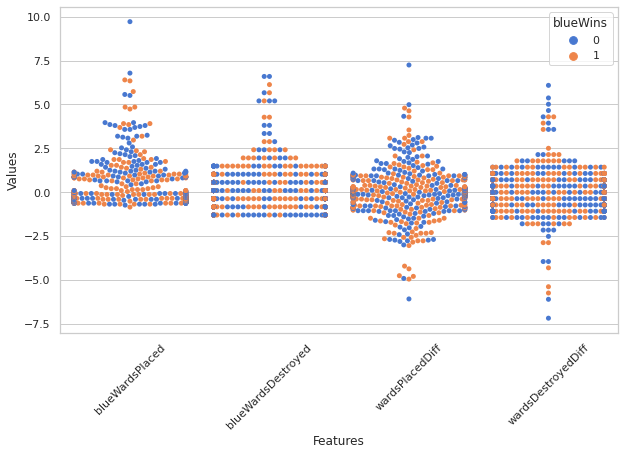

In [37]:
sns.set(style='whitegrid', palette='muted')

x['wardsPlacedDiff'] = x['blueWardsPlaced'] - x['redWardsPlaced']
x['wardsDestroyedDiff'] = x['blueWardsDestroyed'] - x['redWardsDestroyed']

data = x[['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff','wardsDestroyedDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([Nwin, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

Rozkład i niszczenie wardów na wyższym poziomie gry jest usystematyzowany i liniowy. Z doświadczenia można wnioskować że ekstrema w postawionych i zniszczonych prawdopodbnie pochodzą z wardów postawionych masowo w już przegranych meczach.

Dane te nie będą przydatne w modelu

KillsDiff

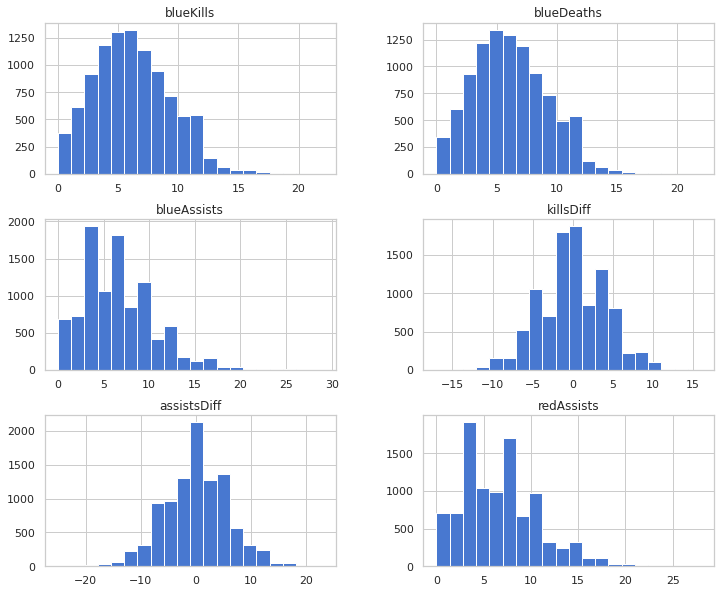

In [38]:
x['killsDiff'] = x['blueKills'] - x['blueDeaths']
x['assistsDiff'] = x['blueAssists'] - x['redAssists']

x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].hist(figsize=(12,10), bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


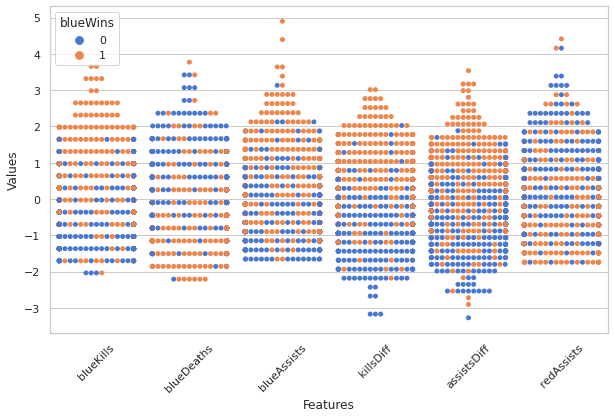

In [39]:
sns.set(style='whitegrid', palette='muted')

data = x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([Nwin, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

Wyraźny wpływ killsDiff i assistsDiff na wynik gry

Smoki i Heraldy

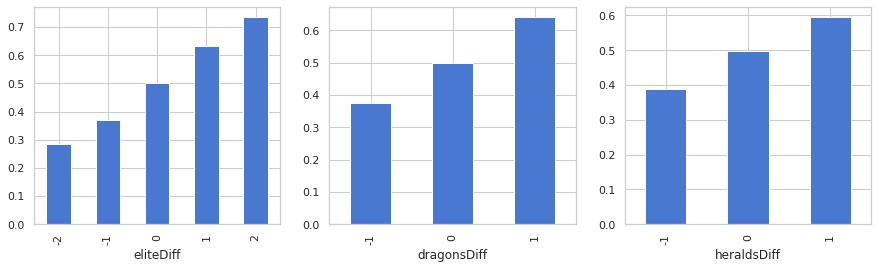

eliteDiff
-2    0.286301
-1    0.368772
 0    0.500683
 1    0.632093
 2    0.735211
Name: blueWins, dtype: float64
dragonsDiff
-1    0.374173
 0    0.500000
 1    0.640940
Name: blueWins, dtype: float64
heraldsDiff
-1    0.387729
 0    0.498680
 1    0.595046
Name: blueWins, dtype: float64


In [40]:
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']

data = pd.concat([Nwin, x], axis=1)

eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

fig, ax = plt.subplots(1,3, figsize=(15,4))

eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])

plt.show()
print(eliteGroup)
print(dragonGroup)
print(heraldGroup)

Smoki i Heraldy mają różny wpływ na grę zostaną więc ujętę jako osobne zmienne 

Wieże 

towerDiff
-2      27
-1     347
 0    9064
 1     406
 2      28
 3       6
 4       1
Name: blueWins, dtype: int64
towerDiff
-2    0.185185
-1    0.216138
 0    0.498124
 1    0.741379
 2    0.964286
 3    1.000000
 4    1.000000
Name: blueWins, dtype: float64


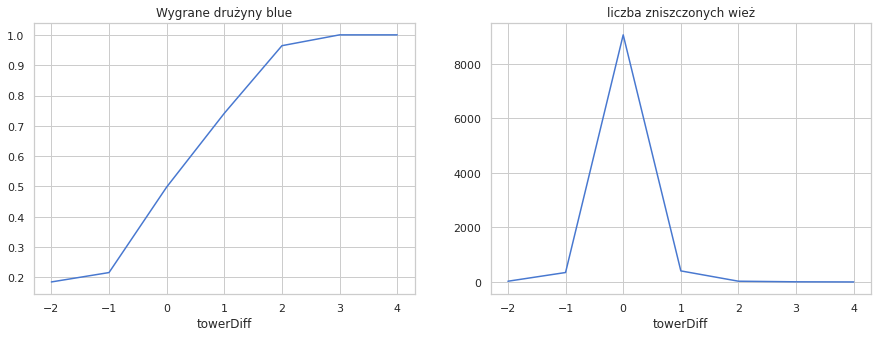

In [41]:
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']

data = pd.concat([Nwin, x], axis=1)

towerGroup = data.groupby(['towerDiff'])['blueWins']


fig, ax = plt.subplots(1,2,figsize=(15,5))

towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Wygrane drużyny blue')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('liczba zniszczonych wież')

print(towerGroup.count())
print(towerGroup.mean())

Wieże których zniszczenie jest jednym z głównych celów meczu mają zdecydowanie duży wpływ na wynik.

Wykres wskazuje na niewielką szanse na zniszczenie wieży przed 10 min gry, ale jeśli już to nastąpi jest to bardzo znaczący czynnik wpłwający na wynik

Złoto i Doświadczenie

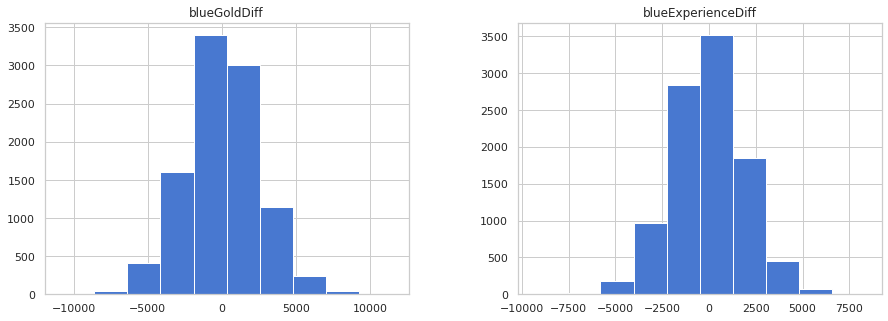

In [42]:
data = pd.concat([Nwin, x], axis=1)

data[['blueGoldDiff','blueExperienceDiff']].hist(figsize=(15,5))
plt.show()

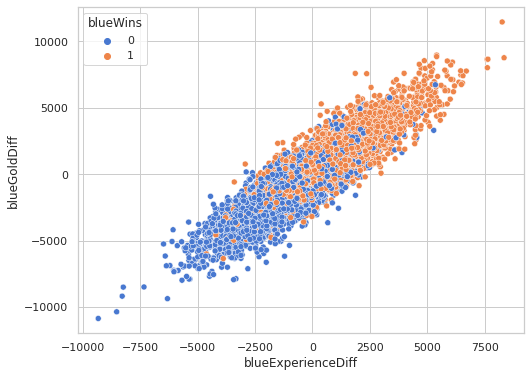

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='blueExperienceDiff', y='blueGoldDiff', hue='blueWins', data=data)

In [44]:
drop_cols = ['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled','blueTotalGold','blueTotalExperience','redTotalGold','redTotalExperience','blueTowersDestroyed','redTowersDestroyed','blueEliteMonsters','blueDragons','blueHeralds',
            'redEliteMonsters','redDragons','redHeralds','blueFirstBlood','blueKills','blueDeaths','blueAssists','redAssists','blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff',
            'wardsDestroyedDiff','redWardsPlaced','redWardsDestroyed', 'redAvgLevel','blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)



In [45]:
x.describe()

,blueGoldDiff,blueExperienceDiff,killsDiff,assistsDiff,dragonsDiff,heraldsDiff,eliteDiff,towerDiff
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,14.414111,-33.620306,0.046260,-0.017006,-0.051119,0.027938,-0.023180,0.008402
std,2453.349179,1920.370438,4.195489,5.766787,0.878945,0.589292,1.067934,0.324835
min,-10830.000000,-9333.000000,-17.000000,-25.000000,-1.000000,-1.000000,-2.000000,-2.000000
25%,-1585.500000,-1290.500000,-3.000000,-4.000000,-1.000000,0.000000,-1.000000,0.000000
50%,14.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1596.000000,1212.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000
max,11467.000000,8348.000000,16.000000,23.000000,1.000000,1.000000,2.000000,4.000000


Uczenie maszynowe

In [47]:
print(x.shape,Nwin.shape)
x.head()

(9879, 8) (9879,)


,blueGoldDiff,blueExperienceDiff,killsDiff,assistsDiff,dragonsDiff,heraldsDiff,eliteDiff,towerDiff
0,643,-8,3,3,0,0,0,0
1,-2908,-1173,0,3,-1,-1,-2,-1
2,-1172,-1033,-4,-10,1,0,1,0
3,-1321,-7,-1,-5,0,1,1,0
4,-1004,230,0,-1,-1,0,-1,0


In [48]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, Nwin, test_size=0.2, random_state=2022)

In [49]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7903, 8) (7903,)
Test set: (1976, 8) (1976,)


Regresja Logistyczna

In [51]:
log_params = {"solver":['newton-cg', 'lbfgs', 'sag', 'saga'],
             "C":[1,5,10,20,30,50,100],
             "warm_start":[True,False]}

In [52]:
log=LogisticRegression()

In [53]:
log_grid = GridSearchCV(log,log_params,verbose=2,n_jobs=-1)

In [54]:
log_grid.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20, 30, 50, 100],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'warm_start': [True, False]},
             verbose=2)

In [55]:
log_grid.best_params_

{'C': 1, 'solver': 'newton-cg', 'warm_start': True}

In [56]:
log=LogisticRegression(penalty="l2",solver="newton-cg",C=50, warm_start=True)

In [57]:
log.fit(X_train, y_train)

LogisticRegression(C=50, solver='newton-cg', warm_start=True)

In [58]:
Nwin_predict_train = log.predict(X_train)
Nwin_predict_test = log.predict(X_test)

In [59]:
Nwin_predict_test[:5]

array([0, 0, 0, 1, 0])

In [60]:
log.intercept_

array([0.01405453])

In [61]:
log.coef_

array([[ 1.04433959,  0.41041512,  0.04303927, -0.07925576,  0.1659948 ,
        -0.01784815,  0.12677043, -0.08461747]])

In [62]:
np.mean(cross_val_score(log,x, Nwin,scoring="accuracy",n_jobs=-1))

0.7333729821144876

In [89]:
np.mean(cross_val_score(log,x, Nwin,scoring="precision",n_jobs=-1))

0.7325090183378975

In [90]:
np.mean(cross_val_score(log,x, Nwin,scoring="f1",n_jobs=-1))

0.7331546117728377

In [91]:
np.mean(cross_val_score(log,x, Nwin,scoring="recall",n_jobs=-1))

0.7338742393509128

**KNN**

In [63]:
knn_params = {"n_neighbors" :np.arange(95,105),
             "weights" : ["distance"],
             "algorithm" : ["ball_tree"] ,
             "leaf_size":[1,2]}

In [64]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params,cv=5,verbose=2,n_jobs=-1)
grid_knn.fit(x,Nwin)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [1, 2],
                         'n_neighbors': array([ 95,  96,  97,  98,  99, 100, 101, 102, 103, 104]),
                         'weights': ['distance']},
             verbose=2)

In [65]:
knn_best_params=grid_knn.best_params_
knn_best_params

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 102,
 'weights': 'distance'}

In [66]:
knn = KNeighborsClassifier(algorithm="ball_tree",n_neighbors=102,weights="distance",leaf_size=1)

In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=102,
                     weights='distance')

In [68]:
Nwin_predict_train_knn = knn.predict(X_train)
Nwin_predict_test_knn = knn.predict(X_test)

In [85]:
np.mean(cross_val_score(knn,x, Nwin,scoring="accuracy",n_jobs=-1))




0.7169755035104802

In [86]:
np.mean(cross_val_score(knn,x, Nwin,scoring="precision",n_jobs=-1))

0.7155376343483127

In [87]:
np.mean(cross_val_score(knn,x, Nwin,scoring="f1",n_jobs=-1))

0.7169013983836513

In [88]:
np.mean(cross_val_score(knn,x, Nwin,scoring="recall",n_jobs=-1))

0.7184584178498986

Random Forest

In [70]:
rdf_params={"criterion":["entropy"],#gini
           "max_depth":[8], #2,4,6
           "min_samples_split":[4],#2,6
           "max_features":["sqrt"]} #log2

In [71]:
rdf=RandomForestClassifier()

In [72]:
rdf_grid=GridSearchCV(rdf,rdf_params,verbose=2,n_jobs=-1)

In [73]:
rdf_grid.fit(x,Nwin)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [8],
                         'max_features': ['sqrt'], 'min_samples_split': [4]},
             verbose=2)

In [74]:
rdf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 4}

In [75]:
rdf=RandomForestClassifier(criterion="entropy",max_depth=8,max_features="sqrt",min_samples_split=4)

In [76]:
rdf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_split=4)

In [77]:
Nwin_predict_test_rnf = rdf.predict(X_test)
Nwin_predict_train_rnf = rdf.predict(X_train)

In [92]:
np.mean(cross_val_score(rdf,x,Nwin,scoring="accuracy",n_jobs=-1))

0.7293243991185363

In [93]:
np.mean(cross_val_score(rdf,x,Nwin,scoring="precision",n_jobs=-1))

0.7287851836774911

In [94]:
np.mean(cross_val_score(rdf,x,Nwin,scoring="f1",n_jobs=-1))

0.7271056927990787

In [95]:
np.mean(cross_val_score(rdf,x,Nwin,scoring="recall",n_jobs=-1))

0.7259634888438135

Ocena modeli

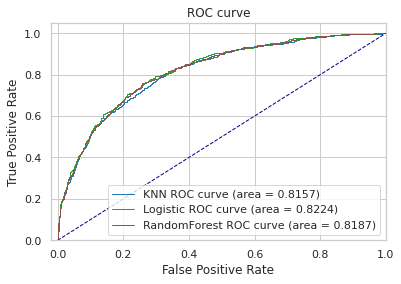

In [79]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

plt.figure()
lw = 1
#knn
knn.fit(X_train,y_train)
knn_pred = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,knn_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:blue',
             lw=lw, label='KNN ROC curve (area = %0.4f)' % roc_auc)
#logreg
log.fit(X_train,y_train)
log_pred = log.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,log_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:green',
             lw=lw, label='Logistic ROC curve (area = %0.4f)' % roc_auc)


#rdf
rdf.fit(X_train,y_train)
rdf_pred = rdf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,rdf_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:brown',
             lw=lw, label='RandomForest ROC curve (area = %0.4f)' % roc_auc)



plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Najlepszy wynik otrzymaliśmy w regresji logistycznej wyniki wszystkich modeli są zbliżone. 

Wyniki na poziomie 73% w 10 min można uznać za zadowalające ze względu na nieprzewidywalną naturę gry, wiele więcej zmiennych które nie są śledzone oraz czynnik ludzki.

Do dalszego zbadania analiza false positive wyników i  ich korelacji z przewagą w wyizolowanych statystykach (np. przewaga/strata w totaJungleMinions) oraz różnica między różnymi poziomami gry, analizowane mecze pochodziły z górnego 1%, niższy poziom gry = trudniejsza predykcja. 